# Linearization

## Definition 
**Linearization** in regression tasks refers to the process of transforming a non-linear relationship between the independent and dependent variables into a linear one. 

We start with some common methods for linearization:

## Linearization using Polynomial
This involves adding polynomial terms (e.g., $ x^2 $, $ x^3 $, etc.) to the model to capture the non-linear relationship. This approach is inspired by Taylor and Maclaurin series.


**Introduction**
**Review Taylor and Maclaurin Series**

Linearization in regression tasks often involves transforming a non-linear relationship into a linear one. One powerful method for achieving this is through the use of Taylor or Maclaurin series, which approximate non-linear functions with polynomial functions.

**Taylor Series Expansion**

For a function $ f(x) $, the Taylor series expansion around a point $ a $ is given by:

$$
f(x) \approx f(a) + f'(a)(x - a) + \frac{f''(a)}{2!}(x - a)^2 + \frac{f'''(a)}{3!}(x - a)^3 + \cdots
$$

**Maclaurin Series**

If the expansion is around $ a = 0 $, it is called the Maclaurin series:

$$
f(x) \approx f(0) + f'(0)x + \frac{f''(0)}{2!}x^2 + \frac{f'''(0)}{3!}x^3 + \cdots
$$

**_Linearization and Polynomial Approximations_**

For linearization, we typically consider the first few terms of the series:

**Linear Approximation** (First-order):

$$
f(x) \approx f(a) + f'(a)(x - a)
$$

**Quadratic Approximation** (Second-order):

$$
f(x) \approx f(a) + f'(a)(x - a) + \frac{f''(a)}{2!}(x - a)^2
$$

**_Example_**: Linearizing $ \sin(x) $ with Maclaurin Series

The Maclaurin series for $ \sin(x) $ is:

$$
\sin(x) \approx x - \frac{x^3}{3!} + \frac{x^5}{5!} - \cdots
$$

For linear approximation:

$$
\sin(x) \approx x
$$

For quadratic approximation:

$$
\sin(x) \approx x - \frac{x^3}{6}
$$

## New Space Based on Polynomial Features

After linearizing a function using polynomial approximations, we can create a new feature space where the transformed features allow us to apply linear regression techniques.

**Polynomial Features**

**Original Feature Space**: Suppose we have a feature $ x $.

**Transformed Feature Space**:
   - Linear term: $ x $
   - Quadratic term: $ x^2 $
   - Cubic term: $ x^3 $
   - And so on...
The feature space $\phi(x) = [1, x, x^2, \ldots, x^k]$ is a transformed domain with $k$ dimensions, which allows us to represent each point in this space using $\phi(x)$. So the polynomial features create a higher-dimensional space that enables us to represent data points in terms of these new features.

**Example: Polynomial Regression**

Consider a dataset where the relationship between $ x $ and $ y $ is non-linear. By introducing polynomial features, it can transform the problem into a linear one.

$$
y = 2 + 3x + 4x^2 + \epsilon
$$

Transform $ x $ into $\phi(x) = [x, x^2] $:

$$
y = 2 + 3x + 4(x^2) + \epsilon
$$
Transform $ x $ into $\phi(x) = [1, x, x^2] $:


## Homework 1
In the following example, I increased the polynomial degree to 35, which resulted in overfitting. Try increasing the degree beyond 35 and solve the problem has arisen.

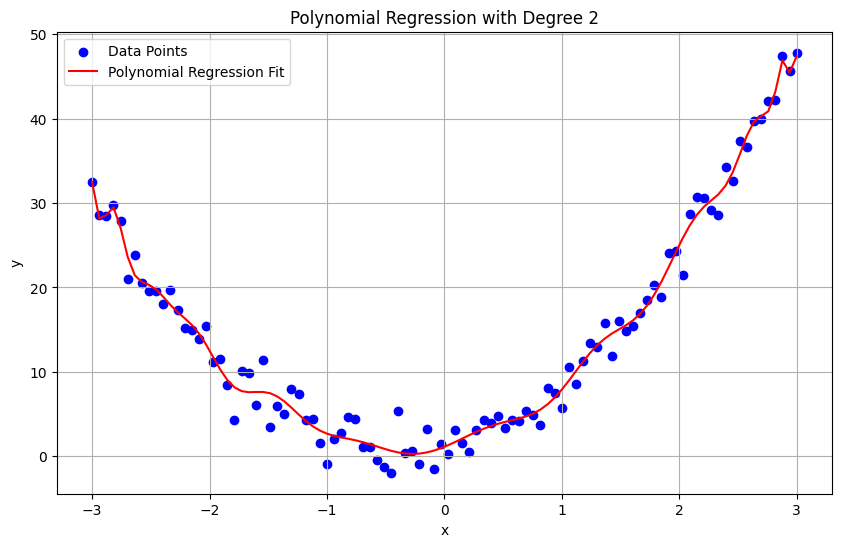

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 2 + 3*x + 4*x**2 + np.random.normal(0, 2, x.shape)

# Reshape x to be a 2D array (as required by scikit-learn)
x = x.reshape(-1, 1)

# Polynomial feature transformation
degree = 30  # We use a polynomial of degree 2 for this example
poly = PolynomialFeatures(degree)
x_poly = poly.fit_transform(x)

# Fit polynomial regression model
model = LinearRegression()
model.fit(x_poly, y)

# Predict values
x_fit = np.linspace(-3, 3, 100).reshape(-1, 1)
x_fit_poly = poly.transform(x_fit)
y_pred = model.predict(x_fit_poly)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_fit, y_pred, color='red', label='Polynomial Regression Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression with Degree 2')
plt.legend()
plt.grid(True)
plt.show()


***Concept Breakdown***

**Polynomial Feature Transformation**: 
   - When we use polynomial features, we transform the original feature $x$ into a higher-dimensional space. For example, a degree-2 polynomial transformation of $x$ results in features $\phi(x) = [1, x, x^2]$. This transformed feature space includes the original feature $x$, its square, and a bias term (constant term 1), making it a 3-dimensional space in this case.

**Linear Regression in the Transformed Space**:
   - Even though the relationship between $x$ and $y$ is non-linear, by transforming $x$ into polynomial features, we can fit a linear model in this new feature space. The linear regression model in this space finds the best-fitting line (or curve) to the polynomial features.

## New Space Created Through Innovative Non-Linear Transformation

Some of these transformations include:
- _Logarithmic Transformation_
 Applying a logarithmic transformation to one or both variables can help linearize certain types of relationships. For example, an exponential relationship $y = ae^{bx}$ can be linearized by taking the natural logarithm: $\ln(y) = \ln(a) + bx$.

- _Power Transformation_
Similar to logarithmic transformation, power transformations (e.g., square root, cube root) can be used to linearize relationships. For instance, $y = ax^b$ can be linearized by taking the logarithm of both sides: $\ln(y) = \ln(a) + b\ln(x)$.

- _Reciprocal Transformation_ 
Transforming variables using their reciprocals can linearize hyperbolic relationships. For example, $y = \frac{a}{x}$ can be linearized by taking the reciprocal of $x$: $y = a \cdot (1/x)$.

### Radial Basis Function (RBF) Transformation

Radial Basis Functions (RBFs) are a class of functions used in various machine learning algorithms, particularly in interpolation and function approximation tasks. They are often employed to transform the feature space into a higher-dimensional space where non-linear relationships can be more easily captured.

The **RBF transformation** maps data into a new feature space defined by radial basis functions. The general form of an RBF is:

$ \phi_i(x) = \exp \left( -\frac{|x - \mu_i|^2}{2\sigma^2} \right) $

where:
- $ x $ is the input feature vector.
- $ \mu_i $ is the center (or mean) of the $i$-th RBF.
- $ \sigma $ is the width (or scale) of the RBF.

**Key Points:**
- **Centers $\mu_i$**: Typically obtained through clustering techniques such as k-means. They represent the points in the input space where the RBF functions are centered.
- **Width $\sigma$**: Controls the spread of the RBF. A larger $\sigma$ results in a broader basis function, and a smaller $\sigma$ results in a narrower function.
- **Distance Metric**: The Euclidean distance $ |x - \mu_i|^2 $ determines how far the input $ x $ is from the center $ \mu_i $. 

For **_regression tasks_**, the transformed feature space can be represented as:

$ \Phi(x) = [ \exp \left( -\frac{|x - \mu_1|^2}{2\sigma^2} \right), \exp \left( -\frac{|x - \mu_2|^2}{2\sigma^2} \right), \ldots, \exp \left( -\frac{|x - \mu_k|^2}{2\sigma^2} \right) ] $

where $ k $ is the number of RBFs. The linear regression model is then fit in this transformed feature space.

RBF Training Mean Squared Error: 16.59
RBF Test Mean Squared Error: 9.90


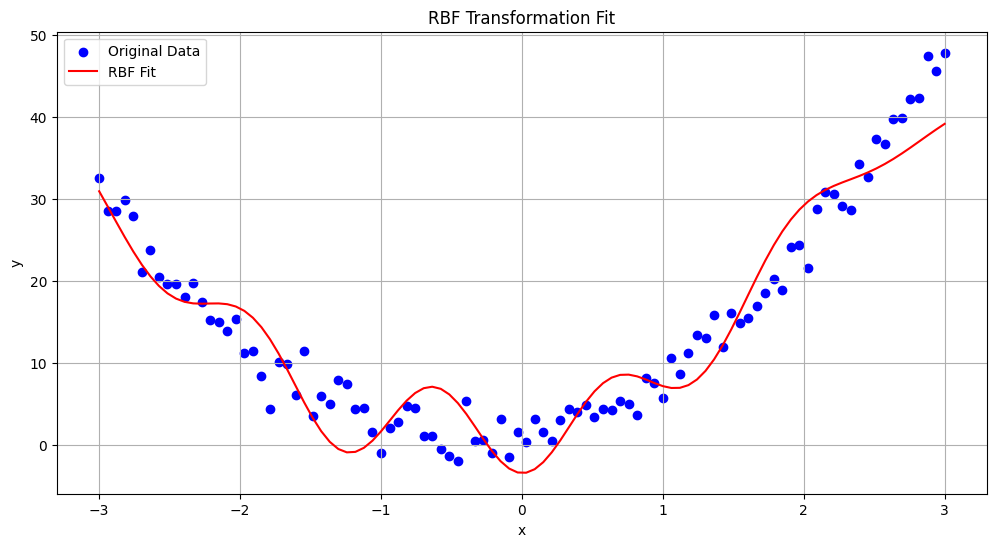

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 2 + 3*x + 4*x**2 + np.random.normal(0, 2, x.shape)

# Reshape x to be a 2D array
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Standardize x
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Number of RBF centers
num_centers = 5
kmeans = KMeans(n_clusters=num_centers, random_state=0)
kmeans.fit(x_scaled)
centers = kmeans.cluster_centers_

# Define RBF function
def rbf(x, centers, sigma):
    x = np.asarray(x)
    num_centers = centers.shape[0]
    rbf_features = np.zeros((x.shape[0], num_centers))
    for i in range(num_centers):
        rbf_features[:, i] = np.exp(-np.sum((x - centers[i]) ** 2, axis=1) / (2 * sigma ** 2))
    return rbf_features

# Apply RBF Transformation
sigma = 0.27  # Width of RBF
x_rbf = rbf(x_scaled, centers, sigma)

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_rbf, y, test_size=0.2, random_state=0)

# Fit a linear model in the RBF space
model_rbf = LinearRegression()
model_rbf.fit(x_train, y_train)
y_fit_pred_rbf = model_rbf.predict(rbf(x_scaled, centers, sigma))

# Calculate errors
train_mse_rbf = mean_squared_error(y, model_rbf.predict(x_rbf))
test_mse_rbf = mean_squared_error(y_test, model_rbf.predict(x_test))

print(f"RBF Training Mean Squared Error: {train_mse_rbf:.2f}")
print(f"RBF Test Mean Squared Error: {test_mse_rbf:.2f}")

# Plot results
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(np.linspace(-3, 3, 100), model_rbf.predict(rbf(scaler.transform(np.linspace(-3, 3, 100).reshape(-1, 1)), centers, sigma)), color='red', label='RBF Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('RBF Transformation Fit')
plt.legend()
plt.grid(True)
plt.show()


## HomeWork 2
You used spline basis functions for linearization in regression, similar to how radial basis functions (RBF), polynomials, or other basis functions are used for linearization.

### Linearization of Data Using Neighbors

Linearization using neighboring points is a technique to locally approximate a nonlinear function by a linear one. This method involves using nearby data points to fit a local linear model, making it easier to understand and predict the behavior of the function within a small region. This can be particularly useful when dealing with complex data where global linearization is not feasible.

### Key Concepts

**Local Linearization**: Instead of trying to linearize the entire dataset, we focus on smaller regions or neighborhoods around each data point.
**Neighbors**: The data points that are close to a given point in the feature space. The choice of neighbors can be based on a fixed radius, a fixed number of nearest neighbors (k-nearest neighbors), or other criteria.
**Weighted Linear Regression**: When fitting a local linear model, we can assign weights to the neighbors based on their distance from the target point. Closer points get higher weights.

### Steps for Linearization Using Neighbors

**Select Neighbors**: Choose the neighboring points around the target point. This can be done using k-nearest neighbors or based on a fixed radius.
**Fit Local Model**: Use the neighbors to fit a linear regression model. If using weights, closer points should have more influence on the fit.
**Predict**: Use the local linear model to make predictions.


## Homework 3

Check the effect of different values of $ k $ by experimenting with various $ k $ values. Could you provide some notes on overfitting or adding regularization to the following code to prevent it?

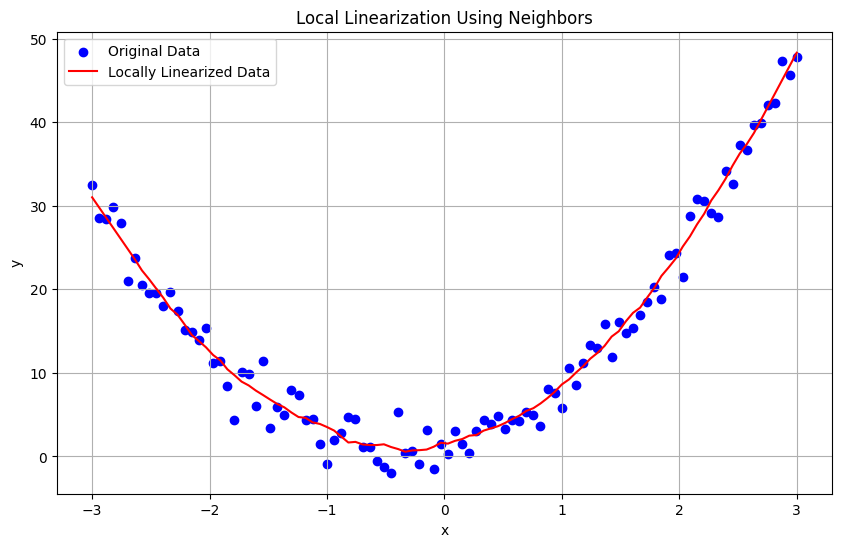

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors

# Generate synthetic data
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 2 + 3*x + 4*x**2 + np.random.normal(0, 2, x.shape)

# Reshape x and y to be 2D arrays
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Number of neighbors to use
k = 13

# Fit local linear models and make predictions
y_pred = np.zeros_like(y)
nbrs = NearestNeighbors(n_neighbors=k).fit(x)
for i in range(len(x)):
    distances, indices = nbrs.kneighbors(x[i].reshape(1, -1))
    neighbors_x = x[indices].reshape(-1, 1)
    neighbors_y = y[indices].ravel()
    model = LinearRegression().fit(neighbors_x, neighbors_y)
    y_pred[i] = model.predict(x[i].reshape(1, -1))

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x, y_pred, color='red', label='Locally Linearized Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Local Linearization Using Neighbors')
plt.legend()
plt.grid(True)
plt.show()


### Piecewise Linear Approximation

The **Piecewise linear approximation** technique able to linearize or approximate nonlinear data.This method involves dividing the data into segments and fitting a separate linear model to each segment. This approach can handle nonlinearity by capturing the local linear behavior within each segment.
Piecewise linear approximation breaks the data into multiple intervals and fits a linear model to each interval. This method is useful when the data exhibits different linear trends in different regions.

### Mathematical Foundation of Piecewise Linear Approximation

**Definition**
A piecewise linear approximation involves partitioning the input space into $k$ intervals and fitting a linear model to the data points within each interval. For a given data set with input $x$ and output $y$, the piecewise linear model can be expressed as:

$$ y = \begin{cases} 
a_1 x + b_1 & \text{for } x \in [x_0, x_1) \\
a_2 x + b_2 & \text{for } x \in [x_1, x_2) \\
\vdots \\
a_k x + b_k & \text{for } x \in [x_{k-1}, x_k]
\end{cases} $$

where:
- $a_i$ and $b_i$ are the coefficients of the linear model in the $i$-th interval.
- $x_0, x_1, \ldots, x_k$ are the breakpoints that define the intervals.

**Mathematical Formulation**
**Partitioning the Domain**: The domain of the data is partitioned into intervals. The breakpoints $x_1, x_2, \ldots, x_{k-1}$ are either predetermined or determined using a method such as clustering.

**Linear Models within Intervals**:
   - For each interval $[x_{i-1}, x_i)$, fit a linear regression model:
     $$
     y = a_i x + b_i
     $$
   - The coefficients $a_i$ and $b_i$ are determined by minimizing the sum of squared errors within the interval:
     $$
     \text{SSE}_i = \sum_{x_j \in [x_{i-1}, x_i)} (y_j - (a_i x_j + b_i))^2
     $$

**Combining Models**: The overall model is a combination of the linear models in each interval, with continuity enforced at the breakpoints. In many applications, continuity of the function is enforced at the breakpoints but can be denied:
   - Continuity of function:
     $$
     a_i x_i + b_i = a_{i+1} x_i + b_{i+1}
     $$

***Example*** 

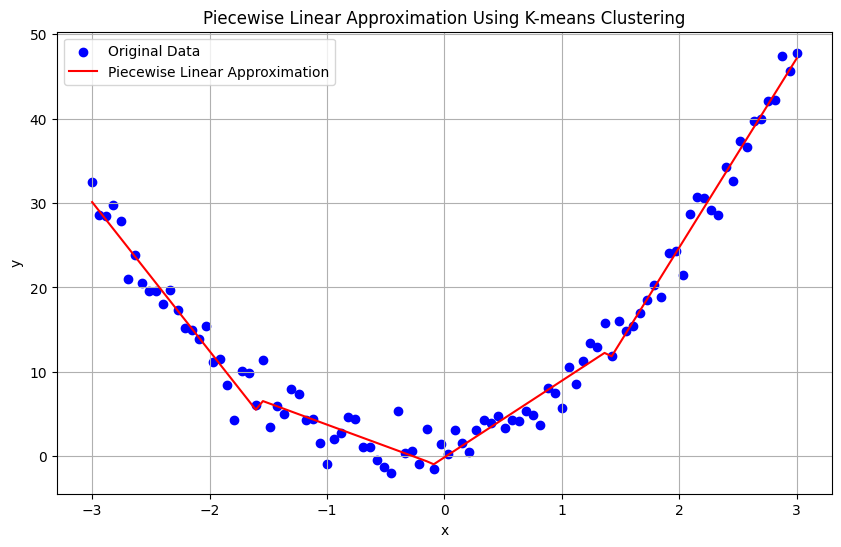

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# Generate synthetic data
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 2 + 3*x + 4*x**2 + np.random.normal(0, 2, x.shape)

# Reshape x and y to be 2D arrays
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Number of clusters
n_clusters = 4

# Apply K-means clustering to determine breakpoints
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(x)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Sort centroids to use as breakpoints
breakpoints = np.sort(centroids.flatten())

# Fit linear models to each cluster
models = []
for i in range(n_clusters):
    mask = (labels == i)
    segment_x = x[mask]
    segment_y = y[mask]
    model = LinearRegression().fit(segment_x, segment_y)
    models.append(model)

# Predict using the piecewise linear models
y_pred = np.zeros_like(y)
for i in range(n_clusters):
    mask = (labels == i)
    segment_x = x[mask]
    y_pred[mask] = models[i].predict(segment_x)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x, y_pred, color='red', label='Piecewise Linear Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Piecewise Linear Approximation Using K-means Clustering')
plt.legend()
plt.grid(True)
plt.show()


**_Note_** Ensuring continuity at the breakpoints in piecewise linear approximation
#### Mathematical Derivation for continuity at the breakpoints
**Piecewise Linear Models**
   Suppose we have $ n $ intervals defined by breakpoints $ x_0, x_1, \ldots, x_n $, and each interval $[x_i, x_{i+1})$ has its own linear model:

$$
y = a_i x + b_i \quad \text{for } x \in [x_i, x_{i+1})
$$

$$
y = a_{i+1} x + b_{i+1} \quad \text{for } x \in [x_{i+1}, x_{i+2})
$$

**Continuity at Breakpoints**
To ensure continuity of the function at $ x_{i+1} $, the function values at this breakpoint must be the same for both intervals:
$$
a_i x_{i+1} + b_i = a_{i+1} x_{i+1} + b_{i+1}
$$

Rearranging to solve for $ b_{i+1} $:
$$
b_{i+1} = a_i x_{i+1} + b_i - a_{i+1} x_{i+1}
$$

$$
b_{i+1} = b_i + (a_i - a_{i+1}) x_{i+1}
$$

### Homework 4
Apply Continuity at Breakpoints in the above code

## <span style="color:yellow">**My Soloution for above Homework**</span>

### Weighting procedure

To address the problem of achieving a smooth and accurate piecewise linear approximation with continuity, we can follow the **Weighting procedure** approach. This involves partitioning the data using K-means clustering, fitting linear models to each cluster, and then using a weighted averaging approach based on Gaussian distributions to ensure smooth transitions.

#### Approach

**Training:**
**Clustering for Partitioning**: Use K-means to partition the data into clusters.
**Gaussian Over Each Cluster**: Model each cluster using a Gaussian distribution centered at the cluster mean and with a variance representing the dispersion of the cluster.
**Fitting Linear Models**: Fit linear models to each cluster using the Ordinary Least Squares (OLS) method.

**Testing:**
**Weighting Procedure**: For each sample, compute weights using the Gaussian distributions (based on the distance to each cluster center).
**Fit by All Linear Regressors**: Compute the weighted predictions from all linear regressors.
**Fusion Step**: Combine the predictions using the computed weights to get the final prediction.

#### Mathematical Foundation

**Training Phase**

**Clustering with K-means**:
   - Given data points $(x_i, y_i)$, apply K-means clustering to partition the data into $k$ clusters.
   - Let $\mu_j$ be the mean of cluster $j$.

**Gaussian Modeling**:
   - For each cluster $j$, define a Gaussian distribution $\mathcal{N}(\mu_j, \sigma_j^2)$ where $\sigma_j^2$ is the variance of cluster $j$.

**Fitting Linear Models**:
   - For each cluster $j$, fit a linear model $L_j(x) = a_j x + b_j$ using OLS.

**Testing Phase**

**Weighting Procedure**:
   - For a new sample $x$, compute the weight $w_j$ for each cluster $j$ using the Gaussian distribution:

     $$
     w_j(x) = \frac{1}{\sqrt{2\pi\sigma_j^2}} \exp\left(-\frac{(x - \mu_j)^2}{2\sigma_j^2}\right)
     $$

**Fit by All Linear Regressors**:
   - Compute the predictions from all linear models:

     $$
     L_j(x) = a_j x + b_j
     $$

**Fusion Step**:
   - Combine the predictions using the weights to get the final prediction:

     $$
     L(x) = \frac{\sum_{j=1}^k L_j(x) w_j(x)}{\sum_{j=1}^k w_j(x)}
     $$


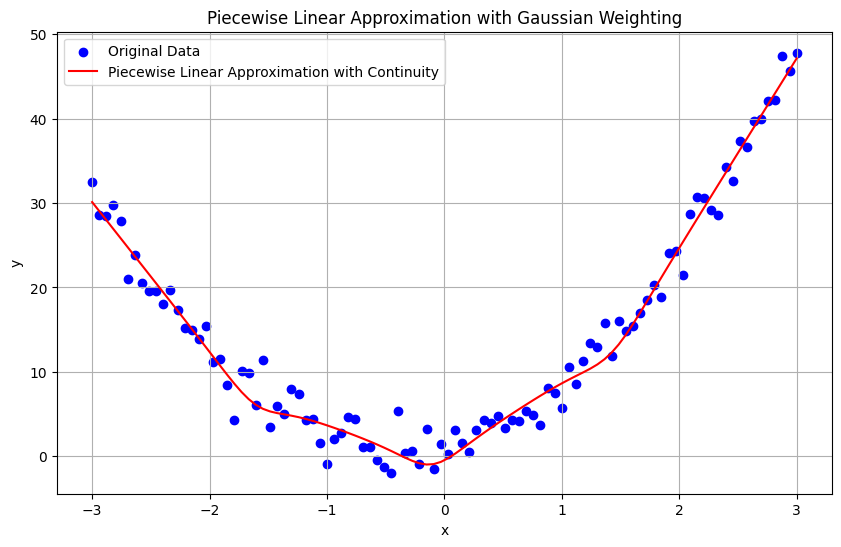

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from scipy.stats import norm

# Generate synthetic data
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 2 + 3*x + 4*x**2 + np.random.normal(0, 2, x.shape)

# Reshape x and y to be 2D arrays
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Number of clusters (segments)
n_clusters = 4

# Apply K-means clustering to partition the data
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(x)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Fit linear models to each cluster
models = []
gaussians = []

for i in range(n_clusters):
    mask = (labels == i)
    segment_x = x[mask]
    segment_y = y[mask]
    
    # Fit linear model
    model = LinearRegression().fit(segment_x, segment_y)
    models.append(model)
    
    # Calculate Gaussian parameters
    mean = centroids[i, 0]
    variance = np.var(segment_x)
    gaussians.append((mean, variance))

# Function to compute the final prediction using the weighted average
def predict(x_new, models, gaussians):
    weights = np.zeros((x_new.shape[0], len(models)))
    predictions = np.zeros((x_new.shape[0], len(models)))
    
    for i, (model, (mean, variance)) in enumerate(zip(models, gaussians)):
        # Compute weights using Gaussian
        weights[:, i] = norm.pdf(x_new, mean, np.sqrt(variance)).flatten()
        
        # Compute predictions from each model
        predictions[:, i] = model.predict(x_new).flatten()
    
    # Compute the weighted average
    weighted_predictions = np.sum(predictions * weights, axis=1) / np.sum(weights, axis=1)
    
    return weighted_predictions

# Generate new x values for Testing
x_new = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred = predict(x_new, models, gaussians)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x_new, y_pred, color='red', label='Piecewise Linear Approximation with Continuity')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Piecewise Linear Approximation with Gaussian Weighting')
plt.legend()
plt.grid(True)
plt.show()


### Adaptive Neuro Fuzzy Inference Systsem (ANFIS)

#### Mathematical Foundation

An Adaptive Neuro-Fuzzy Inference System (ANFIS) combines the learning capabilities of neural networks with the fuzzy logic reasoning of fuzzy inference systems. It is particularly useful for modeling nonlinear functions and is composed of a set of fuzzy if-then rules that have learning capability to approximate nonlinear functions.

#### Structure of ANFIS

**Fuzzification Layer**: 
    - Inputs are mapped to fuzzy sets using membership functions.
    - If we have two inputs $ x $ and $ y $, we use fuzzy sets $ A_i $ and $ B_i $.

**Rule Layer**:
    - Rules are formed using the fuzzy sets from the fuzzification layer.
    - For example, a rule could be: $ \text{If } x \text{ is } A_i \text{ and } y \text{ is } B_i \text{ then } f_i = p_i x + q_i y + r_i $.
  
**Normalization Layer**:
    - The degree to which each rule is activated is computed.
    - The activation weight for rule $ i $ is $ w_i = \mu_{A_i}(x) \cdot \mu_{B_i}(y) $, where $ \mu $ represents the membership function.
    - These weights are then normalized: $ \bar{w_i} = \frac{w_i}{\sum w_j} $.

**Consequent Layer**:
    - Each rule's output is calculated as $ f_i = \bar{w_i} \cdot (p_i x + q_i y + r_i) $.

**Output Layer**:
    - The overall output is the weighted average of each rule's output: $ \text{Output} = \sum \bar{w_i} \cdot f_i $.

### Steps in ANFIS Training

**Initialization**:
    - Define initial fuzzy rules and membership functions.

**Forward Pass**:
    - Calculate the output for each layer from input to output layer.
    - Compute the overall output.

**Backward Pass (Learning)**:
    - Update the parameters of the membership functions and the linear coefficients of the rules using error backpropagation.

## Homework 4
a. Implement ANFIS in Python. Provide a Jupyter notebook similar to previous homework assignments.
b. View the output of ANFIS using the Matlab toolbox or similar methods.

## Some of my papers about **Regression**

1. Hajiabadi, H., Monsefi, R., & Yazdi, H. S. (Year). Robust regression extended with ensemble loss function. *Applied Intelligence*, 49, 1437-1450.

2. Vahedian, A., Yazdi, M. S., Effati, S., & Yazdi, H. S. (Year). Fuzzy cost support vector regression on the fuzzy samples. *Applied Intelligence*, 35, 428-435.

3. Yazdi, H. S., Arghiani, M., & Nemati, E. (Year). Nonlinear regression model of a human hand volume: A nondestructive method. *International Journal of Control and Automation*, 4(2), 111-124.

4. Yazdi, H. S., Royani, T., Yazdi, M. S., & Effati, S. (Year). Fuzzy cost support vector regression. *International Journal of Intelligent Systems and Technologies*, 4.

5. Yazdi, H. S., Royani, T., Yazdi, M. S., & Effati, S. (Year). Fuzzy cost support vector regression. *International Journal of Mathematical and Computational Sciences*, 2(8), 587-592.

6. Yazdi, H. S., Yazdi, M. S., & Vahedian, A. (Year). A new regressor for bandwidth calculation of a rectangular microstrip antenna. *International Journal of Microwave and Optical Technology*, 4(6).


## Some of my papers about **Fuzzy**

Here is the list of sentences with some refinements for clarity and readability:

1. **Unsupervised adaptive neural-fuzzy inference system for solving differential equations**
   - HS Yazdi, R Pourreza
   - Applied Soft Computing, 10(1), 267-275

2. **Fuzzy temperature control in a batch polymerization reactor using the ANFIS method**
   - M Alipoor, M Zeinali, HS Yazdi
   - International Journal of Engineering and Technology, 1(1), 7

3. **Neuro-fuzzy based constraint programming**
   - HS Yazdi, SE Hosseini, MS Yazdi
   - Applied Mathematical Modelling, 34(11), 3547-3559

4. **Gait recognition based on invariant leg classification using a neuro-fuzzy algorithm as the fusion method**
   - H Sadoghi Yazdi, HJ Fariman, J Roohi
   - International Scholarly Research Notices, 2012(1), 289721

5. **Constraint learning using adaptive neural-fuzzy inference system**
   - H Sadoghi Yazdi, R Pourreza, M Sadoghi Yazdi
   - International Journal of Intelligent Computing and Cybernetics, 3(2), 257-278

6. **FCM-fuzzy rule base: A new rule extraction mechanism**
   - H Khosravi, MHY Moghaddam, A Shahroudi, HS Yazdi
   - 2011 International Conference on Innovations in Information Technology, 261-265

7. **A neural network model for solving stochastic fuzzy multiobjective linear fractional programs**
   - H Sadoghi Yazdi
   - First Joint Congress on Fuzzy and Intelligent Systems

8. **Robust hybrid learning approach for adaptive neuro-fuzzy inference systems**
   - A Nik-Khorasani, A Mehrizi, H Sadoghi-Yazdi
   - Fuzzy Sets and Systems, 481, 108890

9. **Image semantic retrieval using image fuzzification based on weighted relevance feedback**
   - S Imandoost, HS Yazdi, J Haddadnia
   - 2010 18th Iranian Conference on Electrical Engineering, 476-482

10. **A novel unsupervised neuro-fuzzy system applied to circuit analysis**
    - H Sadoghi Yazdi
    - First Joint Congress on Fuzzy and Intelligent Systems, Ferdowsi University